# Baseline models

#### In this notebook we will use our functions to import and clean the data to get some first models, that we can use as baselines to further improve

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from src.data.make_dataset import merge_data 
from src.features.build_features import features,split_data
pd.options.display.max_columns =70

# I. Import whole dataset

#### At first we use our self defined function merge data to import and concatenate our train and test set, so we can use the same preprocessing steps on all our data together.

In [2]:
# merge the dataset at a whole (train, test & target data all together)
train_values = pd.read_csv('../data/external/train_values.csv', index_col='building_id')
train_target = pd.read_csv('../data/external/train_labels.csv', index_col='building_id')
test_values = pd.read_csv('../data/external/test_values.csv', index_col='building_id')

df=merge_data(train_values, train_target, test_values)
df=df.reset_index()
display(df)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
347464       310028               4             605            3623   
347465       663567              10            1407           11907   
347466      1049160              22            1136            7712   
347467       442785               6            1041             912   
347468       501372              26              36            6436   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                         2   30                6                  5   
1                         2   10                8                  7   
2                         2   10                5                  5   
3                         2   10                6                  5   
4                         3   30                8                  9   
...                     ...  ...              ...                ...   
347464                    3   70               20                  6   
347465                    3   25                6                  7   
347466                    1   50                3                  3   
347467                    2    5                9                  5   
347468                    2   10               11                  4   

       land_surface_condition foundation_type roof_type ground_floor_type  \
0                           t               r         n                 f   
1                           o               r         n                 x   
2                           t               r         n                 f   
3                           t               r         n                 f   
4                           t               r         n                 f   
...                       ...             ...       ...               ...   
347464                      t               r         q                 f   
347465                      n               r         n                 f   
347466                      t               r         n                 f   
347467                      t               r         n                 f   
347468                      t               r         q                 v   

       other_floor_type position plan_configuration  \
0                     q        t                  d   
1                     q        s                  d   
2                     x        t                  d   
3                     x        s                  d   
4                     x        s                  d   
...                 ...      ...                ...   
347464                q        t                  d   
347465                q        s                  d   
347466                j        s                  d   
347467                q        s                  d   
347468                q        s                  d   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                                  1                                    1   
1                                  0                                    1   
2                                  0                                    1   
3                                  0                                    1   
4                                  1                                    0   
...                              ...                                  ...   
347464                             0                                    1   
347465                             1                                    1   
347466     

# II. Preprocess dataset

#### We will now use our self-defined function features to take some first preprocessing steps including one-hot-encoding and scaling our features

In [3]:
# apply features function where encoding and scaling features from above happens
df=features(df)

In [4]:
display(df)

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906               6             487           12198   
1             28830               8             900            2812   
2             94947              21             363            8973   
3            590882              22             418           10694   
4            201944              11             131            1488   
...             ...             ...             ...             ...   
347464       310028               4             605            3623   
347465       663567              10            1407           11907   
347466      1049160              22            1136            7712   
347467       442785               6            1041             912   
347468       501372              26              36            6436   

        count_floors_pre_eq  age  area_percentage  height_percentage  \
0                     0.125   30                6                  5   
1                     0.125   10                8                  7   
2                     0.125   10                5                  5   
3                     0.125   10                6                  5   
4                     0.250   30                8                  9   
...                     ...  ...              ...                ...   
347464                0.250   70               20                  6   
347465                0.250   25                6                  7   
347466                0.000   50                3                  3   
347467                0.125    5                9                  5   
347468                0.125   10               11                  4   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                                  1                                    1   
1                                  0                                    1   
2                                  0                                    1   
3                                  0                                    1   
4                                  1                                    0   
...                              ...                                  ...   
347464                             0                                    1   
347465                             1                                    1   
347466                             0                                    1   
347467                             1                                    1   
347468                             0                                    0   

        has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   
...                               ...                                     ...   
347464                              0                                       0   
347465                              1                                       0   
347466                              0                                       0   
347467                              0                                       0   
347468                              0                                       0   

        has_superstructure_mud_mortar_brick  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
347464                                    0   
347465          

# III. Feature Selection

#### We will investigate the Correlations between our features and get rid of correlated features (correlatin > 0.8) to make our model more interpretable.

<ipython-input-5-c3cbffdb7fa2>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


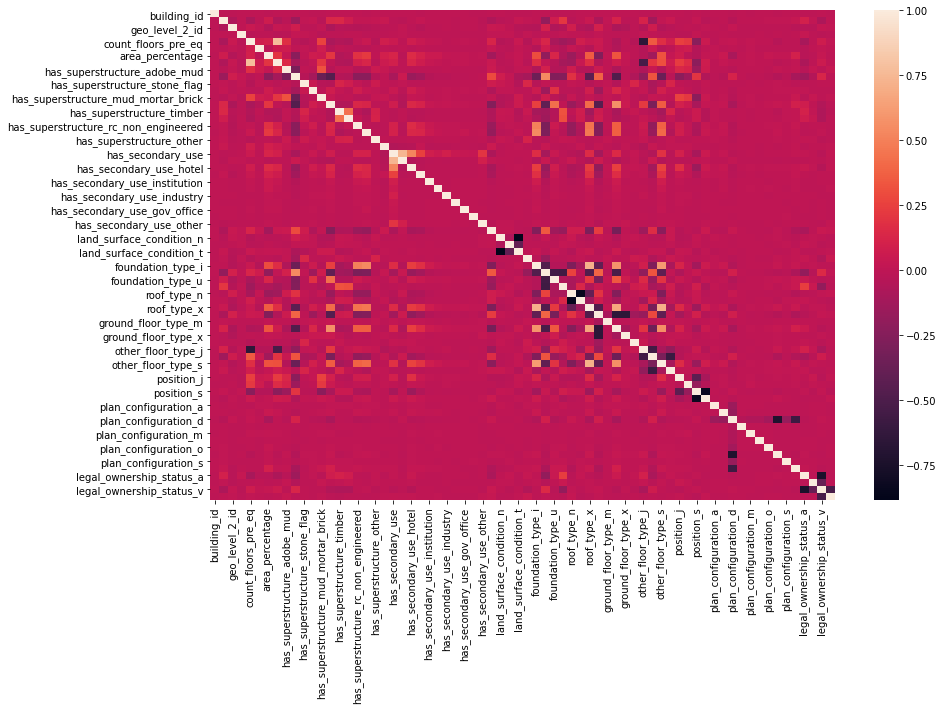

In [5]:
# investigate correlation heatmap
corrMatrix=df.corr()
f=plt.figure(figsize=(14,9))
sns.heatmap(corrMatrix, annot=False)
f.show()

In [6]:
# print all correlated features and drop them from the dataset
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            print(f"The following features are correlated: {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}. Correlation = {round(abs(correlation_matrix.iloc[i, j]),2)}")
            colname = correlation_matrix.columns[i] # changed from i to j here for dropping
            correlated_features.add(colname)

print(f"Drop the following features: {correlated_features}")
df=df.drop(columns=correlated_features)

The following features are correlated: land_surface_condition_t and land_surface_condition_n. Correlation = 0.88
The following features are correlated: roof_type_q and roof_type_n. Correlation = 0.85
The following features are correlated: position_t and position_s. Correlation = 0.83
Drop the following features: {'land_surface_condition_t', 'roof_type_q', 'position_t'}


# IV. Split dataset back into train and test set and generate a rebalance train set


#### We now use our self-defined function split_data to get our now preprocessed train and test set.

In [7]:
#scale geo_features for logistic regression and runtime
geo_features = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id','age','area_percentage','height_percentage']
scaler = MinMaxScaler()
df[geo_features] = scaler.fit_transform(df[geo_features])
df

building_id  geo_level_1_id  geo_level_2_id  geo_level_3_id  \
0            802906        0.200000        0.341275        0.970637   
1             28830        0.266667        0.630694        0.223761   
2             94947        0.700000        0.254380        0.714013   
3            590882        0.733333        0.292922        0.850959   
4            201944        0.366667        0.091801        0.118405   
...             ...             ...             ...             ...   
347464       310028        0.133333        0.423966        0.288295   
347465       663567        0.333333        0.985985        0.947481   
347466      1049160        0.733333        0.796076        0.613671   
347467       442785        0.200000        0.729502        0.072571   
347468       501372        0.866667        0.025228        0.512135   

        count_floors_pre_eq       age  area_percentage  height_percentage  \
0                     0.125  0.030151         0.050505           0.100000   
1                     0.125  0.010050         0.070707           0.166667   
2                     0.125  0.010050         0.040404           0.100000   
3                     0.125  0.010050         0.050505           0.100000   
4                     0.250  0.030151         0.070707           0.233333   
...                     ...       ...              ...                ...   
347464                0.250  0.070352         0.191919           0.133333   
347465                0.250  0.025126         0.050505           0.166667   
347466                0.000  0.050251         0.020202           0.033333   
347467                0.125  0.005025         0.080808           0.100000   
347468                0.125  0.010050         0.101010           0.066667   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                                  1                                    1   
1                                  0                                    1   
2                                  0                                    1   
3                                  0                                    1   
4                                  1                                    0   
...                              ...                                  ...   
347464                             0                                    1   
347465                             1                                    1   
347466                             0                                    1   
347467                             1                                    1   
347468                             0                                    0   

        has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   
...                               ...                                     ...   
347464                              0                                       0   
347465                              1                                       0   
347466                              0                                       0   
347467                              0                                       0   
347468                              0                                       0   

        has_superstructure_mud_mortar_brick  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
347

In [8]:
data_train, target_train, data_test = split_data(df)
data_train

geo_level_1_id  geo_level_2_id  geo_level_3_id  \
building_id                                                   
802906             0.200000        0.341275        0.970637   
28830              0.266667        0.630694        0.223761   
94947              0.700000        0.254380        0.714013   
590882             0.733333        0.292922        0.850959   
201944             0.366667        0.091801        0.118405   
...                     ...             ...             ...   
688636             0.833333        0.935529        0.128989   
669485             0.566667        0.501051        0.163921   
602512             0.566667        0.035739        0.649558   
151409             0.866667        0.027330        0.147291   
747594             0.700000        0.006307        0.724198   

             count_floors_pre_eq       age  area_percentage  \
building_id                                                   
802906                     0.125  0.030151         0.050505   
28830                      0.125  0.010050         0.070707   
94947                      0.125  0.010050         0.040404   
590882                     0.125  0.010050         0.050505   
201944                     0.250  0.030151         0.070707   
...                          ...       ...              ...   
688636                     0.000  0.055276         0.050505   
669485                     0.125  0.000000         0.050505   
602512                     0.250  0.055276         0.050505   
151409                     0.125  0.010050         0.131313   
747594                     0.250  0.010050         0.060606   

             height_percentage  has_superstructure_adobe_mud  \
building_id                                                    
802906                0.100000                             1   
28830                 0.166667                             0   
94947                 0.100000                             0   
590882                0.100000                             0   
201944                0.233333                             1   
...                        ...                           ...   
688636                0.033333                             0   
669485                0.100000                             0   
602512                0.166667                             0   
151409                0.133333                             0   
747594                0.133333                             0   

             has_superstructure_mud_mortar_stone  \
building_id                                        
802906                                         1   
28830                                          1   
94947                                          1   
590882                                         1   
201944                                         0   
...                                          ...   
688636                                         1   
669485                                         1   
602512                                         1   
151409                                         0   
747594                                         1   

             has_superstructure_stone_flag  \
building_id                                  
802906                                   0   
28830                                    0   
94947                                    0   
590882                                   0   
201944                                   0   
...                                    ...   
688636                                   0   
669485                                   0   
602512                                   0   
151409                                   0   
747594                                   0   

             has_superstructure_cement_mortar_stone  \
building_id                                           
802906                                            0   
28830                                             0   
94947                                       

# V. Model building - Baselines

#### To evaluate our models, we will first split our train set into a new train set and a validation set. We will use 5-fold cross-validation on our training set, so that we are able to see which models perform good by default on our validation set and choose three models for deep-diving. We will also have a look, wether rebalancing will improve with another oversampled train set our predictions.

## Train-Test-Split

In [9]:
# train-test split with stratify
data_train, data_test, target_train, target_test = train_test_split(data_train, target_train, test_size=0.2, random_state=42, stratify=target_train)

## Rebalance Train Set

Text(0, 0.5, 'Frequency')

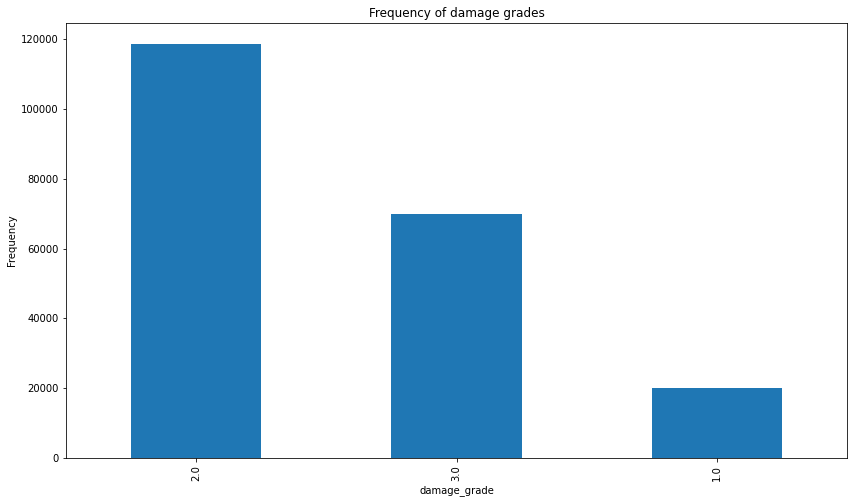

In [10]:
# investigate distribution of target variable
ax = target_train.value_counts().plot(kind='bar', figsize=(14,8), title="Frequency of damage grades")
ax.set_xlabel("damage_grade")
ax.set_ylabel("Frequency")

Text(0, 0.5, 'Frequency')

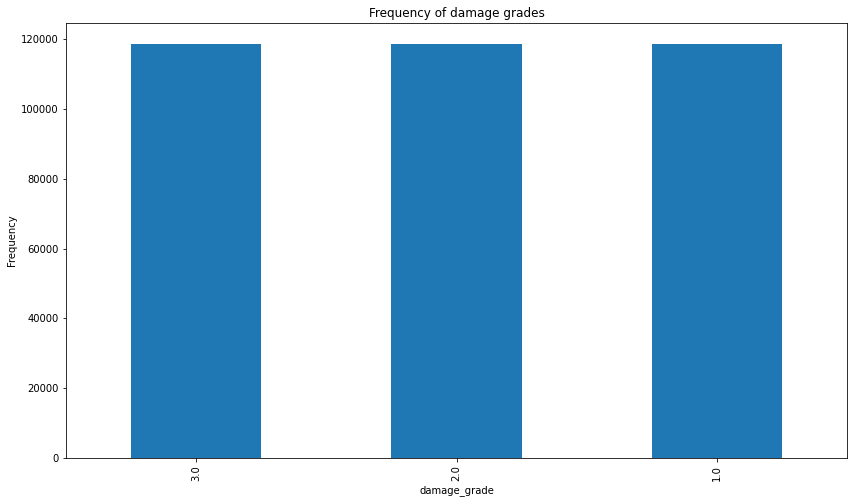

In [11]:
# choose to randomly oversample the train dataset as class 2 is highly over represented for our target variable damage grade
sampler = RandomOverSampler()
train_balanced_data, train_balanced_target = sampler.fit_resample(data_train, target_train)

ax = train_balanced_target.value_counts().plot(kind='bar', figsize=(14,8), title="Frequency of damage grades")
ax.set_xlabel("damage_grade")
ax.set_ylabel("Frequency")

In [12]:
train_balanced_data

geo_level_1_id  geo_level_2_id  geo_level_3_id  count_floors_pre_eq  \
0             0.700000        0.655221        0.474656                0.250   
1             0.100000        0.861247        0.087451                0.125   
2             0.700000        0.854240        0.215246                0.250   
3             0.666667        0.110722        0.195114                0.125   
4             0.300000        0.469516        0.475611                0.125   
...                ...             ...             ...                  ...   
355816        0.200000        0.263490        0.324660                0.125   
355817        0.700000        0.714085        0.543328                0.125   
355818        0.200000        0.263490        0.081563                0.125   
355819        0.100000        0.704975        0.947800                0.250   
355820        0.600000        0.093903        0.762075                0.250   

             age  area_percentage  height_percentage  \
0       0.020101         0.050505           0.133333   
1       0.020101         0.050505           0.100000   
2       0.045226         0.050505           0.100000   
3       0.010050         0.060606           0.100000   
4       0.000000         0.080808           0.133333   
...          ...              ...                ...   
355816  0.015075         0.070707           0.066667   
355817  0.025126         0.050505           0.066667   
355818  0.020101         0.060606           0.133333   
355819  0.070352         0.020202           0.133333   
355820  0.020101         0.070707           0.133333   

        has_superstructure_adobe_mud  has_superstructure_mud_mortar_stone  \
0                                  0                                    1   
1                                  1                                    1   
2                                  0                                    1   
3                                  0                                    0   
4                                  0                                    0   
...                              ...                                  ...   
355816                             0                                    1   
355817                             0                                    1   
355818                             0                                    1   
355819                             0                                    0   
355820                             0                                    1   

        has_superstructure_stone_flag  has_superstructure_cement_mortar_stone  \
0                                   0                                       0   
1                                   0                                       0   
2                                   0                                       0   
3                                   0                                       0   
4                                   0                                       0   
...                               ...                                     ...   
355816                              0                                       0   
355817                              0                                       0   
355818                              0                                       0   
355819                              0                                       0   
355820                              1                                       0   

        has_superstructure_mud_mortar_brick  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   
...                                     ...   
355816                                    0   
355817                                    0   
355818                                    0   
355819            

# Baseline model majority class

#### As a first baseline we will use a prediction model, that will just predict the majority class for all our targets in the validation set. Since we know that 148.259/260.601= 56,89% of our houses have damage_grade 2, all our targets will get label 2.

In [42]:
prediction = np.zeros((len(target_test), 1))+2
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The Accuracy on test set: 0.5689
The F1-Score micro on test set: 0.5689
The F1-Score macro on test set: 0.2417
Confusion Matrix : 
[[    0  5025     0]
 [    0 29652     0]
 [    0 17444     0]]


#### As expected the majority class vote has a not so bad f1_micro score and a worse f1_macro, since we only predict class 2.

# Decision Tree

### ohne Rebalance

In [13]:
dt = DecisionTreeClassifier()
cross_val=cross_val_score(dt, data_train, target_train, cv=5, scoring='f1_micro')
dt.fit(data_train,target_train)
prediction = dt.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The cv-score on train set: {:.4f}".format(np.amax(cross_val)))
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The cv-score on train set: 0.6532
The Accuracy on test set: 0.6580
The F1-Score micro on test set: 0.6580
The F1-Score macro on test set: 0.6076
Confusion Matrix : 
[[ 2531  2174   320]
 [ 2376 20925  6351]
 [  323  6282 10839]]


### mit Rebalance

In [14]:
dt = DecisionTreeClassifier()
dt.fit(train_balanced_data, train_balanced_target)
prediction = dt.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The Accuracy on test set: 0.6590
The F1-Score micro on test set: 0.6590
The F1-Score macro on test set: 0.6080
Confusion Matrix : 
[[ 2492  2237   296]
 [ 2253 21021  6378]
 [  326  6281 10837]]


# Logistic Regression

### ohne Rebalance

In [15]:
lr = LogisticRegression(max_iter=10000)
cross_val=cross_val_score(lr, data_train, target_train, cv=5, scoring='f1_micro')
lr.fit(data_train,target_train)
prediction = lr.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The cv-score on train set: {:.4f}".format(np.amax(cross_val)))
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The cv-score on train set: 0.5934
The Accuracy on test set: 0.5919
The F1-Score micro on test set: 0.5919
The F1-Score macro on test set: 0.4628
Confusion Matrix : 
[[ 1467  3443   115]
 [ 1044 25911  2697]
 [   88 13883  3473]]


### mit Rebalance

In [16]:
lr = LogisticRegression(max_iter=10000)
lr.fit(train_balanced_data, train_balanced_target)
prediction = lr.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The Accuracy on test set: 0.5075
The F1-Score micro on test set: 0.5075
The F1-Score macro on test set: 0.5047
Confusion Matrix : 
[[ 3451   740   834]
 [ 4756 11107 13789]
 [  777  4771 11896]]


# Naive Bayes

### ohne Rebalance

In [17]:
nb=GaussianNB()
cross_val=cross_val_score(nb, data_train, target_train, cv=5, scoring='f1_micro')
nb.fit(data_train,target_train)
prediction = nb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The cv-score on train set: {:.4f}".format(np.amax(cross_val)))
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The cv-score on train set: 0.4202
The Accuracy on test set: 0.4194
The F1-Score micro on test set: 0.4194
The F1-Score macro on test set: 0.3981
Confusion Matrix : 
[[ 2929   594  1502]
 [ 4312  3472 21868]
 [  891  1093 15460]]


### mit Rebalance

In [18]:
nb=GaussianNB()
nb.fit(train_balanced_data, train_balanced_target)
prediction = nb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The Accuracy on test set: 0.4175
The F1-Score micro on test set: 0.4175
The F1-Score macro on test set: 0.3947
Confusion Matrix : 
[[ 3014   518  1493]
 [ 4543  3248 21861]
 [  973   971 15500]]


# KNN

### ohne Rebalance

In [19]:
knn=KNeighborsClassifier()
cross_val=cross_val_score(knn, data_train, target_train, cv=5, scoring='f1_micro')
knn.fit(data_train,target_train)
prediction = knn.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The cv-score on train set: {:.4f}".format(np.amax(cross_val)))
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The cv-score on train set: 0.6641
The Accuracy on test set: 0.6698
The F1-Score micro on test set: 0.6698
The F1-Score macro on test set: 0.6104
Confusion Matrix : 
[[ 2373  2448   204]
 [ 1941 22490  5221]
 [  322  7075 10047]]


### mit Rebalance

In [20]:
knn=KNeighborsClassifier()
knn.fit(train_balanced_data, train_balanced_target)
prediction = knn.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The Accuracy on test set: 0.6135
The F1-Score micro on test set: 0.6135
The F1-Score macro on test set: 0.5861
Confusion Matrix : 
[[ 3602  1093   330]
 [ 4980 16623  8049]
 [  954  4737 11753]]


# MLP Classifier

### ohne Rebalance

In [24]:
mlp=MLPClassifier()
cross_val=cross_val_score(mlp, data_train, target_train, cv=5, scoring='f1_micro')
mlp.fit(data_train,target_train)
prediction = mlp.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The cv-score on train set: {:.4f}".format(np.amax(cross_val)))
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't conv

The cv-score on train set: 0.6644
The Accuracy on test set: 0.6587
The F1-Score micro on test set: 0.6587
The F1-Score macro on test set: 0.5986
Confusion Matrix : 
[[ 1999  2797   229]
 [ 1163 22152  6337]
 [   93  7169 10182]]


### mit Rebalance

In [31]:
mlp=MLPClassifier()
mlp.fit(train_balanced_data, train_balanced_target)
prediction = mlp.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The Accuracy on test set: 0.5607
The F1-Score micro on test set: 0.5607
The F1-Score macro on test set: 0.5439
Confusion Matrix : 
[[ 4042   708   275]
 [ 6932 13257  9463]
 [ 1271  4250 11923]]


# Random Forest

### ohne Rebalance

In [32]:
rf = RandomForestClassifier()
cross_val=cross_val_score(rf, data_train, target_train, cv=5,scoring='f1_micro')
rf.fit(data_train, target_train)
prediction = rf.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The cv-score on train set: {:.4f}".format(np.amax(cross_val)))
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The cv-score on train set: 0.7164
The Accuracy on test set: 0.7184
The F1-Score micro on test set: 0.7184
The F1-Score macro on test set: 0.6606
Confusion Matrix : 
[[ 2424  2497   104]
 [ 1216 24477  3959]
 [  122  6777 10545]]


### mit Rebalance

In [34]:
rf = RandomForestClassifier()
rf.fit(train_balanced_data, train_balanced_target)
prediction = rf.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

The Accuracy on test set: 0.7058
The F1-Score micro on test set: 0.7058
The F1-Score macro on test set: 0.6643
Confusion Matrix : 
[[ 2948  1936   141]
 [ 1977 22656  5019]
 [  232  6027 11185]]


# XGBoost

### ohne Rebalance

In [13]:
xgb = XGBClassifier()
cross_val=cross_val_score(xgb, data_train, target_train, cv=5, scoring='f1_micro')
xgb.fit(data_train, target_train)
prediction = xgb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The cv-score on train set: {:.4f}".format(np.amax(cross_val)))
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:53:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The cv-score on train set: 0.7288
The Accuracy on test set: 0.7300
The F1-Score micro on test set: 0.7300
The F1-Score macro on test set: 0.6669
Confusion Matrix : 
[[ 2306  2667    52]
 [  971 25323  3358]
 [   78  6947 10419]]


### mit Rebalance

In [14]:
xgb = XGBClassifier()
xgb.fit(train_balanced_data, train_balanced_target)
prediction = xgb.predict(data_test)
xgb = xgb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1_mic= f1_score(target_test,prediction,average='micro') 
f1_mac= f1_score(target_test,prediction,average='macro') 
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score micro on test set: {:.4f}".format(f1_mic))
print("The F1-Score macro on test set: {:.4f}".format(f1_mac))
print('Confusion Matrix : \n' + str(confusion_matrix(target_test,prediction)))

c:\users\nikla\pycharmprojects\data_mining_1\venv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:59:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The Accuracy on test set: 0.6735
The F1-Score micro on test set: 0.6735
The F1-Score macro on test set: 0.6498
Confusion Matrix : 
[[ 4170   750   105]
 [ 4964 17978  6710]
 [  599  3887 12958]]


## --> Result: Performance is better without balancing! We will continue without it

## We will now focus on KNN, Random Forest and XGBoost to add additional features and get a deep-dive in the next notebook.